## Welcome to the Data Science & Analytics takehome exam. Please submit answers using this Jupyter notebook. Please email zipped files to ross.fadely@wsj.com within three days of receiving the exam.

# Scenario

Imagine our team is helping design a campaign to target attendees of the upcoming SXSW festival in 2019. The team would like to better understand website traffic during the most recent SXSW festival (March 2018) to inform what type of content to promote in 2019.

The data in data.csv is a sample of website traffic to wsj.com from first-time visitors who are non-subscribers in the Austin, Texas area (based on IP address).

The objective is to identify which content will turn first-time visitors into loyal readers and subscribers.

<b>Note: Each row in data.csv represents a single page view.</b>
***

# Data

| Column Name	| Description |
|---------------|-------------|
|customerID	|unique customer ID|
|firstVisitDate|	Date and time of customer's first visit|
|secondVisitDate|	Date and time of customer's second visit, if any|
|articleID|	unique ID of the article read on the customer's the first visit|
|section|	section of the article read on the first visit|
|author	|author(s) of the article read on the first visit|
|headline	|headline of the article read on the first visit|
|topicKeywords|	topic keywords in article read on the first visit|
|totalVisits	|the customer's total visits to-date since firstVisitDate|
|wordCount|	word count of the customer's first article|
|videoCount	|number of videos in article|

***

# Questions

### 1. What percent of customers returned after the first visit?

In [482]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [483]:
data=pd.read_csv('/Users/marissaposner/Downloads/data (1).csv')
#replace with nan
data=data.replace('\\N',np.nan)
#dedupe - edge case
data=data.drop_duplicates('customerID')
data

,customerID,firstVisitDate,secondVisitDate,articleID,section,author,headline,topicKeywords,totalVisits,wordCount,videoCount
0,0,2018-03-13 08:41:28 UTC,2018-04-14 00:00:00 UTC,SB11210326209662973945104584092013974171076,WSJ_Business,Theo+Francis,WSJ_Article_Business_Are You Underpaid? In a F...,ceo|ceo to median pay ratio|compensation|dariu...,3,1269.0,0.0
1,1,2018-03-14 08:21:54 UTC,NaN,SB11704195083378974371404584099570957708050,WSJ_Business,Paul Ziobro,WSJ_Article_Business_Drones Are Watching: Rail...,data|drone|drones|employee|employer|employers|...,1,917.0,0.0
2,2,2018-03-13 06:18:59 UTC,NaN,SB12775101498795324251604584089331231148204,WSJ_Opinion,Francesco Ronchi,WSJ_Article_Commentary (U.S.)_Italian Voters D...,5-star movement| election|italy| populism| the...,1,895.0,0.0
3,3,2018-03-15 14:18:43 UTC,NaN,SB11027093093037343542404584101860399949656,WSJ_Business,Tim+Higgins,WSJ_Article_Autos_Tesla’s Make-Or-Break Moment...,elon musk |tesla|tesla cash burn|tesla debt|te...,1,951.0,0.0
4,4,2018-03-16 12:56:19 UTC,NaN,SB11027093093037343542404584103340219066918,WSJ_Markets,Laura+Saunders,WSJ_Article_Tax Report_Do You Own Bitcoin? The...,asset|bitcoin|capital gains |coinbase|cryptocu...,1,903.0,1.0
5,5,2018-03-13 14:26:42 UTC,NaN,SB10053721253826474326804584099213856176886,WSJ_Politics,A+Wall+Street+Journal+Roundup,WSJ_Article_Politics and Policy_Donald Trump a...,donald trump|gina haspel|mike pompeo|president...,1,947.0,0.0
6,6,2018-03-18 18:13:23 UTC,NaN,SB12008635076439604245104584087373693353570,WSJ_Opinion,Alexandra+DeSanctis,WSJ_Article_Houses of Worship_Notre Dame Becom...,birth control|catholic church|obama administra...,1,819.0,0.0
7,7,2018-03-13 11:59:08 UTC,NaN,SB10053721253826474326804584099101464018882,WSJ_Politics,Michael+C.+Bender,WSJ_Article_Politics and Policy_Trump’s Person...,2020 campaign|aide fired|mcentee fired|persona...,1,657.0,0.0
8,8,2018-03-12 18:46:24 UTC,NaN,SB10053721253826474326804584097180460822064,WSJ_Markets,Liz+Hoffman,WSJ_Article_Markets Main_Goldman Sachs Puts Da...,david solomon|goldman|goldman sachs ceo|goldma...,1,1169.0,0.0
9,9,2018-03-16 13:37:01 UTC,NaN,SB11027093093037343542404584105290821213788,WSJ_Politics,Michael+C.+Bender,WSJ_Article_Politics and Policy_Donald Trump a...,cabinet|chief of staff|firings|john kelly|staf...,1,1274.0,0.0


In [484]:
return_cust=data['customerID'].loc[(data['secondVisitDate'].notnull())].count()
#get total number of CustomerIDs
total_cust=data['customerID'].count()
#add new column based on boolean
data['returned'] = (data['secondVisitDate'].notnull())

print('Percentage of returning customers after 1st visit: ', round(return_cust/total_cust *100,2))

Percentage of returning customers after 1st visit:  11.82


### 2. What are the top three best-performing stories in each section, by pageviews?

In [485]:
#group by section and articleID in each section & get the sum of the totalVisits 
sections = data.groupby(['section','articleID'])['totalVisits'].sum()
#get top 3 largest for level 0 (section)
sections = sections.groupby(level=0).nlargest(3).reset_index(level=0, drop=True)
sections

section       articleID                                  
WSJ_Business  SB11704195083378974371404584097403724108802     723
              SB11027093093037343542404584101822248659720     210
              SB10342241267609484717704584101481939436054     174
WSJ_Life      SB11805791893646614375304584073542435430108     134
              SB11513260795640254558004584085750469425772     130
              SB12775101498795324251604584089691304167728     127
WSJ_Markets   SB12775101498795324251604584091654130126032     222
              SB11027093093037343542404584103340219066918     160
              SB12008635076439604245104584089491434195378      97
WSJ_Opinion   SB10863058833601644371104583000294067613334     168
              SB10385287216379884548704584103473343707450     127
              SB11513260795640254558004584085581177203524      94
WSJ_Politics  SB10053721253826474326804584099101464018882    1429
              SB11210326209662973945104584091642991444798     994
              SB11

### 3. Based on this data, would you choose to promote a Tech story or a Markets story on social media? Why?

In [5]:
#explore totalVisits data 
grouped = data.groupby(['section'])['totalVisits'].agg({'totalVisits':[np.min,np.max,np.mean, np.median]}).reset_index(col_level=1)
grouped

/Users/marissaposner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


totalVisits                      
        section        amin amax      mean median
0  WSJ_Business           1   64  1.439261      1
1      WSJ_Life           1   17  1.218727      1
2   WSJ_Markets           1   20  1.290076      1
3   WSJ_Opinion           1  117  1.655629      1
4  WSJ_Politics           1   70  1.455154      1
5      WSJ_Tech           1   42  1.378995      1

In [6]:
words = data.groupby(['section'])['wordCount'].agg({'wordCount':[np.min,np.max,np.mean, np.median]}).reset_index(col_level=1)
words

/Users/marissaposner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


wordCount                             
        section      amin    amax         mean  median
0  WSJ_Business     166.0  2766.0  1073.011009  1019.0
1      WSJ_Life     121.0  4700.0  1694.432974  1334.0
2   WSJ_Markets     164.0  2410.0   955.650426   920.0
3   WSJ_Opinion       0.0  1933.0   786.777262   827.0
4  WSJ_Politics     191.0  8723.0   907.073723   732.0
5      WSJ_Tech     185.0  2429.0   987.577049  1067.0

In [7]:
videos = data.groupby(['section'])['videoCount'].agg({'videoCount':[np.min,np.max,np.mean, np.median]}).reset_index(col_level=1)
videos

/Users/marissaposner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


videoCount                      
        section       amin amax      mean median
0  WSJ_Business        0.0  1.0  0.463303    0.0
1      WSJ_Life        0.0  4.0  0.081664    0.0
2   WSJ_Markets        0.0  2.0  0.207065    0.0
3   WSJ_Opinion        0.0  1.0  0.002320    0.0
4  WSJ_Politics        0.0  3.0  0.326094    0.0
5      WSJ_Tech        0.0  4.0  1.172131    1.0

In [486]:
# Get % returned readers per section

#get returned users per section
returned_df = data.groupby(['section'])['returned'].sum().astype(int).to_frame().reset_index()
#get total counts of rows for each section
total_counts=data.groupby(['section']).size().reset_index(name='total_counts')
concatted=pd.concat([returned_df,total_counts],axis=1)
#remove duplicate section column
counts = concatted.loc[:,~concatted.columns.duplicated()]
counts



,section,returned,total_counts
0,WSJ_Business,266,2272
1,WSJ_Life,122,1367
2,WSJ_Markets,107,917
3,WSJ_Opinion,106,906
4,WSJ_Politics,442,3289
5,WSJ_Tech,69,657


In [9]:
#write function that takes two columns in and returns % returned

def percentReturn(returned, total_counts):
    return returned/total_counts*100
for section in counts:
    counts['percent_Returned']=counts.apply(lambda x : percentReturn(x['returned'],x['total_counts']),axis=1)
counts

,section,returned,total_counts,percent_Returned
0,WSJ_Business,266,2272,11.707746
1,WSJ_Life,122,1367,8.924653
2,WSJ_Markets,107,917,11.668484
3,WSJ_Opinion,106,906,11.699779
4,WSJ_Politics,442,3289,13.438735
5,WSJ_Tech,69,657,10.502283


In [10]:
#summary for Tech vs. Markets
pd.DataFrame({'Section': ['WSJ_Tech', 'WSJ_Markets'],'Average_Visits':[1.38,1.29],'Average_Word_Counts':[987.58,955.65],'Average_Video_Counts':[1.17,0.21],'Percent_Return':[10.50,11.67]},index=[0, 1])


,Section,Average_Visits,Average_Word_Counts,Average_Video_Counts,Percent_Return
0,WSJ_Tech,1.38,987.58,1.17,10.50
1,WSJ_Markets,1.29,955.65,0.21,11.67


While markets stories have a higher percent returning visitors (11.67% of visitors return vs. 10.50% for tech), on social media articles are circulated for their virality and not their ability to draw return visitors. However, tech articles have a higher average visits per article which would imply that for that specific article more tech readers return to click on the article again than market readers. 

Markets articles have a lower average word count (955.65 words vs. 987.58 words for tech). A lower word count would lend itself to social media promotion because news on social media is usually easily digestible and is not as long form as say reading the Wall Street Journal in full. Additionally, tech has an average video count per article of 1.17, far higher than markets average video count of 0.21. This would mean that more tech stories are in multimedia form. Generally, social media circulates media posts (images and videos) better than plain text posts. Markets articles have greater loyalty amongst readers (higher % of returning customers) and a lower average word count. 

Even though markets articles have a lower average word count than tech articles and a higher percent returning readers, the virality of tech articles (higher # of average visits) and a higher average video count are the dominating factors in my decision to recommend a social media promotion of tech articles. Social media is about creating viral articles and getting visibility/exposure to new audiences. The multimedia format of many tech articles combined with a higher # of visits create perfect conditions for virality online. 


### 4. Create a visualization exploring the relationship between any of the content characteristics (such as section, author, keywords etc...) and returning visitors. This is an open-ended task. Briefly describe the visualization and the insight.

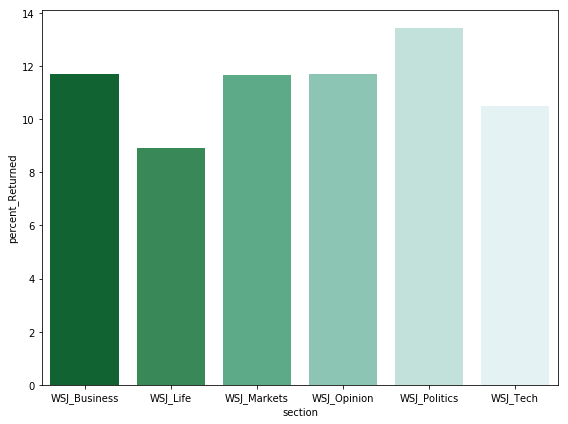

In [11]:
#Exploring section and percent visitors returned 
plt.figure(figsize=(8,6))
sns.barplot(x="section", y="percent_Returned",  data=counts,palette='BuGn_r');
plt.tight_layout()


WSJ_Politics has the highest percent of returning visitors of any section, while WSJ_Life has the lowest % of returning visitors. This is consistent with the df counts above. 

### 5. Create a simple model predicting the likelihood of a first-time visitor returning.

In [507]:
#change to type int
data['return_int']=data['returned'].astype(int)
data_cleaned=data.fillna(0)
data_cleaned

,customerID,firstVisitDate,secondVisitDate,articleID,section,author,headline,topicKeywords,totalVisits,wordCount,videoCount,returned,return_int
0,0,2018-03-13 08:41:28 UTC,2018-04-14 00:00:00 UTC,SB11210326209662973945104584092013974171076,WSJ_Business,Theo+Francis,WSJ_Article_Business_Are You Underpaid? In a F...,ceo|ceo to median pay ratio|compensation|dariu...,3,1269.0,0.0,True,1
1,1,2018-03-14 08:21:54 UTC,0,SB11704195083378974371404584099570957708050,WSJ_Business,Paul Ziobro,WSJ_Article_Business_Drones Are Watching: Rail...,data|drone|drones|employee|employer|employers|...,1,917.0,0.0,False,0
2,2,2018-03-13 06:18:59 UTC,0,SB12775101498795324251604584089331231148204,WSJ_Opinion,Francesco Ronchi,WSJ_Article_Commentary (U.S.)_Italian Voters D...,5-star movement| election|italy| populism| the...,1,895.0,0.0,False,0
3,3,2018-03-15 14:18:43 UTC,0,SB11027093093037343542404584101860399949656,WSJ_Business,Tim+Higgins,WSJ_Article_Autos_Tesla’s Make-Or-Break Moment...,elon musk |tesla|tesla cash burn|tesla debt|te...,1,951.0,0.0,False,0
4,4,2018-03-16 12:56:19 UTC,0,SB11027093093037343542404584103340219066918,WSJ_Markets,Laura+Saunders,WSJ_Article_Tax Report_Do You Own Bitcoin? The...,asset|bitcoin|capital gains |coinbase|cryptocu...,1,903.0,1.0,False,0
5,5,2018-03-13 14:26:42 UTC,0,SB10053721253826474326804584099213856176886,WSJ_Politics,A+Wall+Street+Journal+Roundup,WSJ_Article_Politics and Policy_Donald Trump a...,donald trump|gina haspel|mike pompeo|president...,1,947.0,0.0,False,0
6,6,2018-03-18 18:13:23 UTC,0,SB12008635076439604245104584087373693353570,WSJ_Opinion,Alexandra+DeSanctis,WSJ_Article_Houses of Worship_Notre Dame Becom...,birth control|catholic church|obama administra...,1,819.0,0.0,False,0
7,7,2018-03-13 11:59:08 UTC,0,SB10053721253826474326804584099101464018882,WSJ_Politics,Michael+C.+Bender,WSJ_Article_Politics and Policy_Trump’s Person...,2020 campaign|aide fired|mcentee fired|persona...,1,657.0,0.0,False,0
8,8,2018-03-12 18:46:24 UTC,0,SB10053721253826474326804584097180460822064,WSJ_Markets,Liz+Hoffman,WSJ_Article_Markets Main_Goldman Sachs Puts Da...,david solomon|goldman|goldman sachs ceo|goldma...,1,1169.0,0.0,False,0
9,9,2018-03-16 13:37:01 UTC,0,SB11027093093037343542404584105290821213788,WSJ_Politics,Michael+C.+Bender,WSJ_Article_Politics and Policy_Donald Trump a...,cabinet|chief of staff|firings|john kelly|staf...,1,1274.0,0.0,False,0


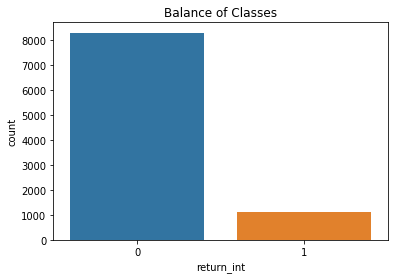

In [508]:
#check if data set is balanced 
sns.countplot('return_int', data=data_cleaned)
plt.title('Balance of Classes')
plt.show()

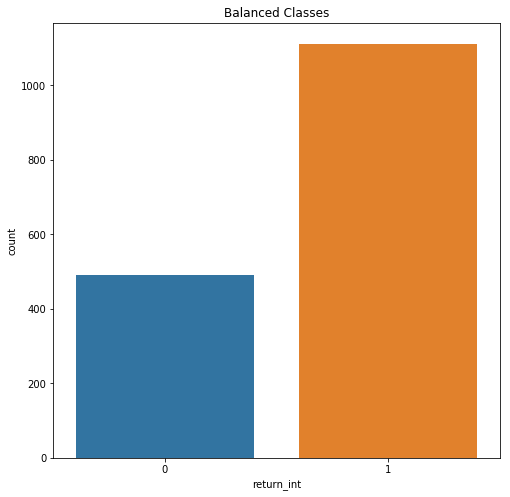

In [509]:
#Going to use SMOTE to correct for imbalanced dataset
#SMOTE techniques look at the feature space for the minority class data points & considers its k nearest neighbours.
#first transform section from categorical to numerical

data_cleaned['section'] = data_cleaned['section'].astype('category')
data_cleaned['section'] = data_cleaned['section'].cat.codes #origin to numerical
#remove columns not using in model 
data_cleaned=data_cleaned.drop(['articleID','author','headline','returned','customerID','topicKeywords','firstVisitDate','secondVisitDate'], axis=1)

# Shuffle Dataset
shuffled_df = data_cleaned.sample(frac=1,random_state=4)

# Put all the returned customers in a separate dataset.
returned = data_cleaned.loc[data_cleaned['return_int'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
nonreturn = data_cleaned.loc[data_cleaned['return_int'] == 0].sample(n=492,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([returned, nonreturn])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('return_int', data=normalized_df)
plt.title('Balanced Classes')
plt.show()



In [419]:
""""from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', random_state=7)
oversampled_trainX, oversampled_trainY = sm.fit_sample(data_cleaned.drop('return_int', axis=1), data_cleaned['return_int'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train.columns = normalized_df.columns

sns.countplot('return_int', data=sm)
plt.title('Balanced Classes')
plt.show()
""""""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-419-6c4643d81365>, line 11)

In [497]:
normalized_df['return_int']

0       1
12      1
23      1
25      1
31      1
35      1
38      1
47      1
55      1
57      1
70      1
71      1
80      1
82      1
106     1
119     1
130     1
132     1
134     1
142     1
177     1
180     1
197     1
210     1
247     1
251     1
298     1
305     1
310     1
312     1
       ..
7794    0
5268    0
8456    0
2480    0
4262    0
9723    0
5481    0
4883    0
6830    0
1298    0
187     0
4757    0
2925    0
8826    0
3455    0
2195    0
1937    0
4742    0
7453    0
1574    0
6486    0
5318    0
46      0
3654    0
8566    0
9808    0
5283    0
9015    0
6265    0
7181    0
Name: return_int, Length: 1604, dtype: int64

In [505]:
#build model to predict whether column return_int is 1 (meaning customer returns) or 
#0 (customer churns & does not return)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
#data_cleaned.columns
X=normalized_df.drop(normalized_df['return_int'])
#X = data_cleaned.drop(['articleID','author','headline','returned','return_int','customerID','topicKeywords','firstVisitDate','secondVisitDate'], axis=1)
y = normalized_df['return_int']
X = X.values
y = y.values
#y=pd.DataFrame.from_records

KeyError: '[1 1 1 ... 1 1 1] not found in axis'

In [491]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=0,stratify=y)

m=LogisticRegression()
m.fit(X_train,y_train)

predicts = m.predict(X_test)#test model accuracy
from sklearn.metrics import classification_report
#print(classification_report(y_test,predicts))
print("Accuracy:", accuracy_score(y_test, predicts))

TypeError: Singleton array array(<bound method DataFrame.from_records of <class 'pandas.core.frame.DataFrame'>>,
      dtype=object) cannot be considered a valid collection.

In [382]:
print(classification_report(y_test,predicts))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      0.98      0.99       121

   micro avg       1.00      1.00      1.00       941
   macro avg       1.00      0.99      1.00       941
weighted avg       1.00      1.00      1.00       941



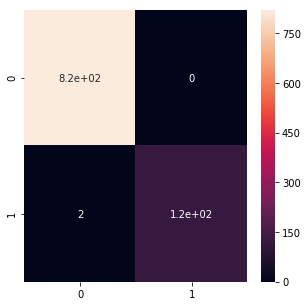

In [367]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

cm=confusion_matrix(y_test,predicts)
df_cm = pd.DataFrame(cm, range(2),
                  range(2))
plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True)

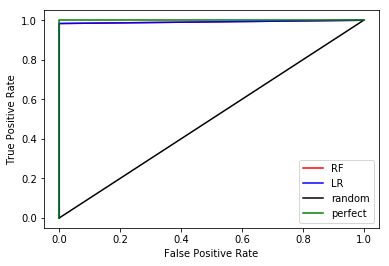

In [368]:
from sklearn.metrics import roc_curve
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, predicts)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, predicts)
import matplotlib.pyplot as plt
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### 6. What additional data would you add to improve the model? (Answer in 3-5 sentences)

Metrics such as advertising revenue earned per customer (eCPM or TCV for example) or per category (WSJ_Tech, etc) would allow me to create a more robust model and not only predict whether a user returns or not, but also predict their value. The issue with the data above was that there was a lack of data 


### 7. What other interesting stories can you tell with this data?

In [ ]:
from sklearn.linear_model import LinearRegression as linreg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X = data_cleaned.drop(['articleID','author','headline','returned','return_int','customerID','topicKeywords','section','firstVisitDate','secondVisitDate'], axis=1)
y = data_cleaned['return_int']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
regression_model=linreg() 
regression_model.fit(X_train, y_train) #fits model with training data
y_predict=regression_model.predict(X_test) #predicting y's based on X test data 

rmse=sqrt(mean_squared_error(y_predict,y_test)) #use your residuals to get your err 
rmse #0.3016901145121774


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
regression_model2=linreg() 

regression_model2.fit(X_train.drop(['totalVisits'],axis=1), y_train) #fits model with training data for those specific cols
y_predict=regression_model2.predict(X_test.drop(['totalVisits'],axis=1)) #predicting y's based on X test data 
rmse=sqrt(mean_squared_error(y_predict,y_test)) #use your residuals to get your err 
rmse # 0.31920382324693974